In [169]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [170]:
data = pd.read_csv('data/kc_house_data.csv') # From https://www.kaggle.com/harlfoxem/housesalesprediction

# Have a look of data

In [171]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [172]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Fortunately, there is no missing value in each field.

# The three main questions to be answered
1. Is the house price increasing ?
2. What factors correlate with the house price mostly?
3. Is it possible to tag a house as "cheap" or "expensive" ? 

(3. If buying a house, which area is suggested ?)

## (1) Is the the house price increasing ?

In order to answer question1, it is necessary to change the date field into date type.

In [174]:
data.date = pd.to_datetime(data.date)

In [175]:
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

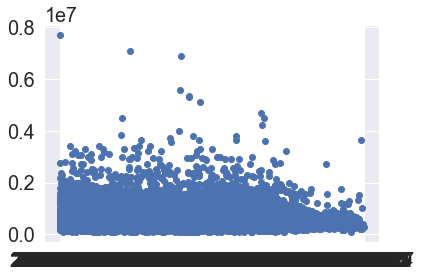

In [176]:
plt.scatter(data['date'].astype(str), data['price'])

It is difficult to observe the trend through scatter plot.
It might be better to use barplot per month.

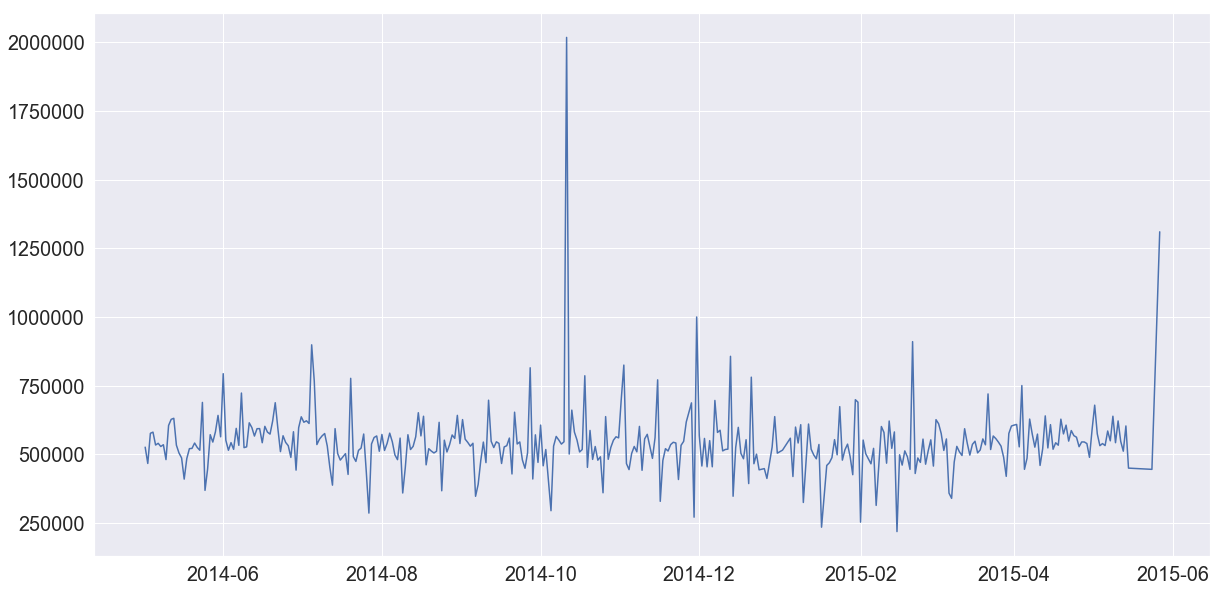

In [179]:
plt.figure(figsize=(20, 10))
plt.plot(data.groupby('date').mean()['price'])

In [177]:
data['year_month'] = data['date'].dt.strftime('%Y-%m')

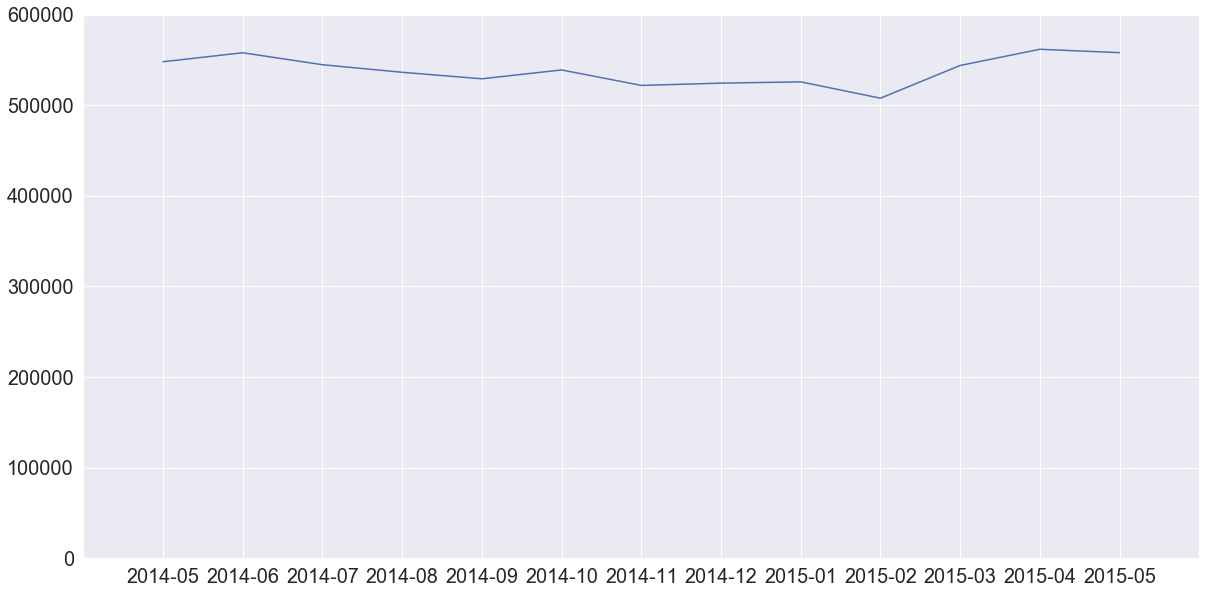

In [178]:
plt.figure(figsize=(20, 10))
plt.axis([-1, 13, 0, 600000])
plt.plot(data.groupby('year_month').mean()['price'])

/Users/kuanyao.huang/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


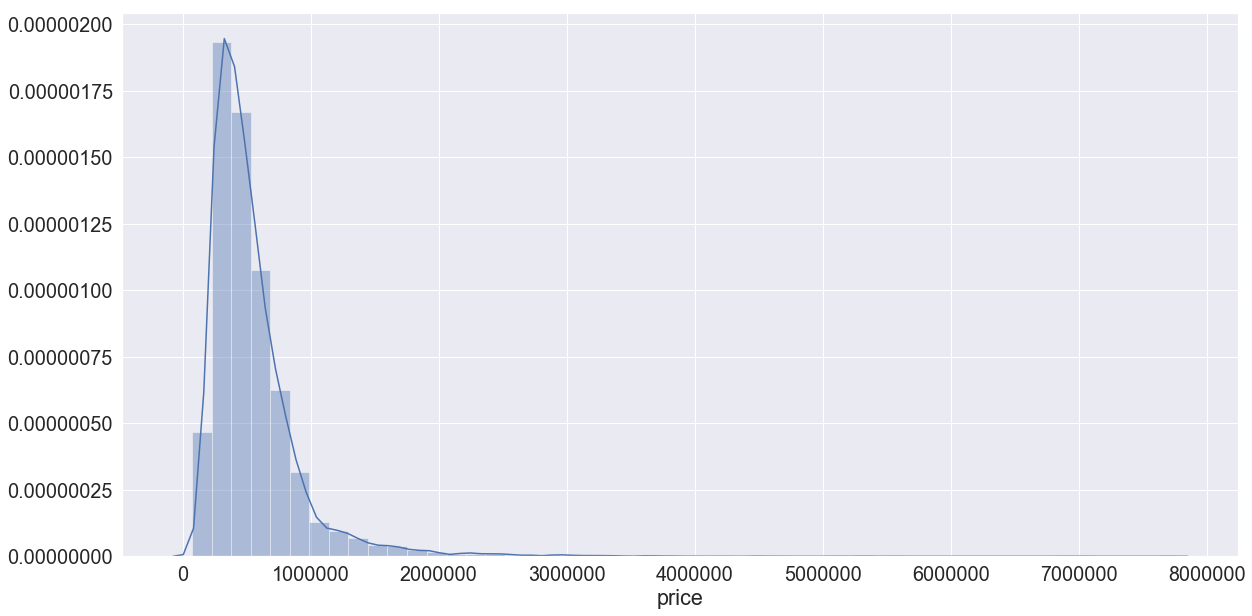

In [180]:
plt.figure(figsize=(20, 10))
#data.price.hist(bins=80)
sns.distplot(data['price'])

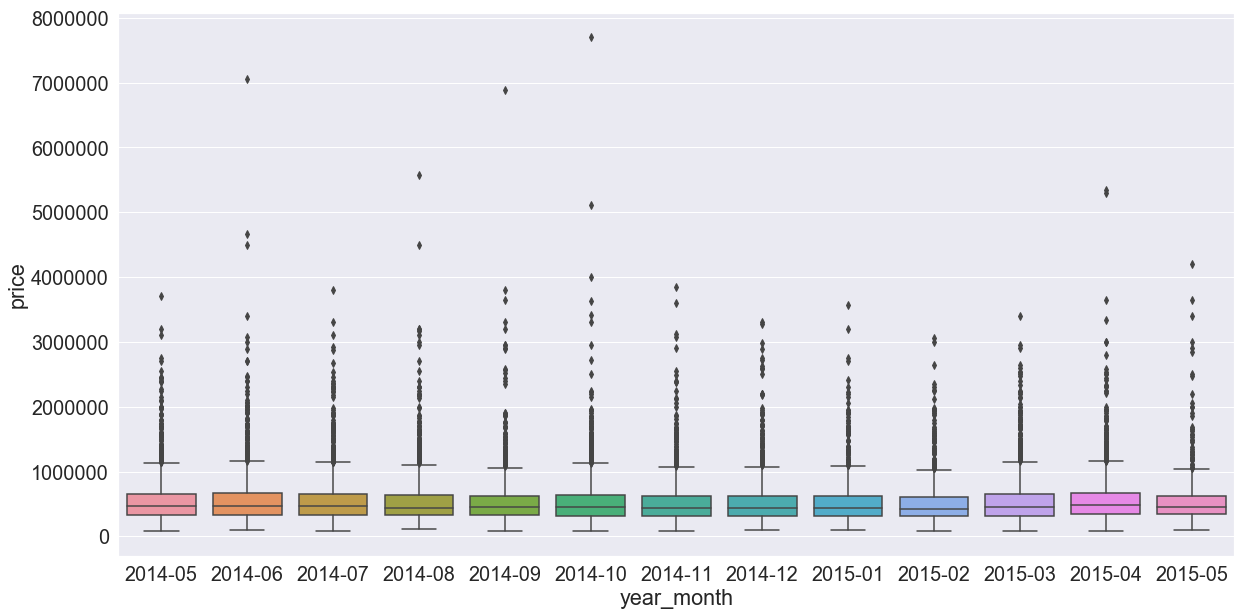

In [181]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='year_month', y="price", data=data, order=['2014-05', '2014-06', '2014-07', '2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05'])

It seems that the average of house price per month does not variate a lot.
Have a deeper look to the other two varalbles (bedrooms & square footage of a lot)

### The price vs. # of bedrooms

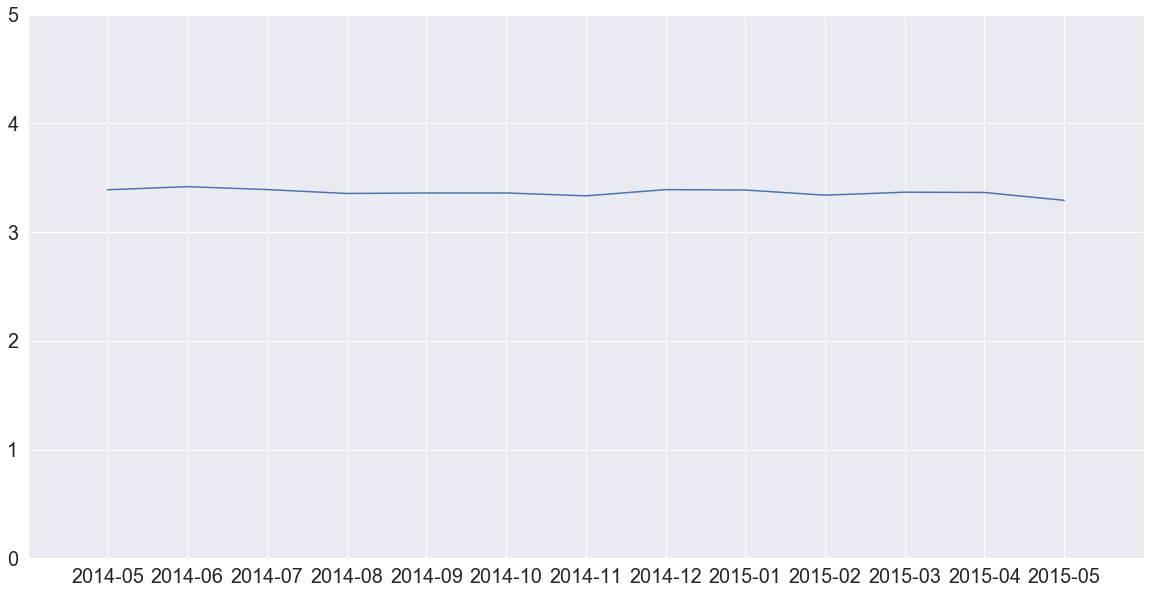

In [182]:
plt.figure(figsize=(20, 10))
plt.axis([-1, 13, 0, 5])
plt.plot(data.groupby('year_month').mean()['bedrooms'])

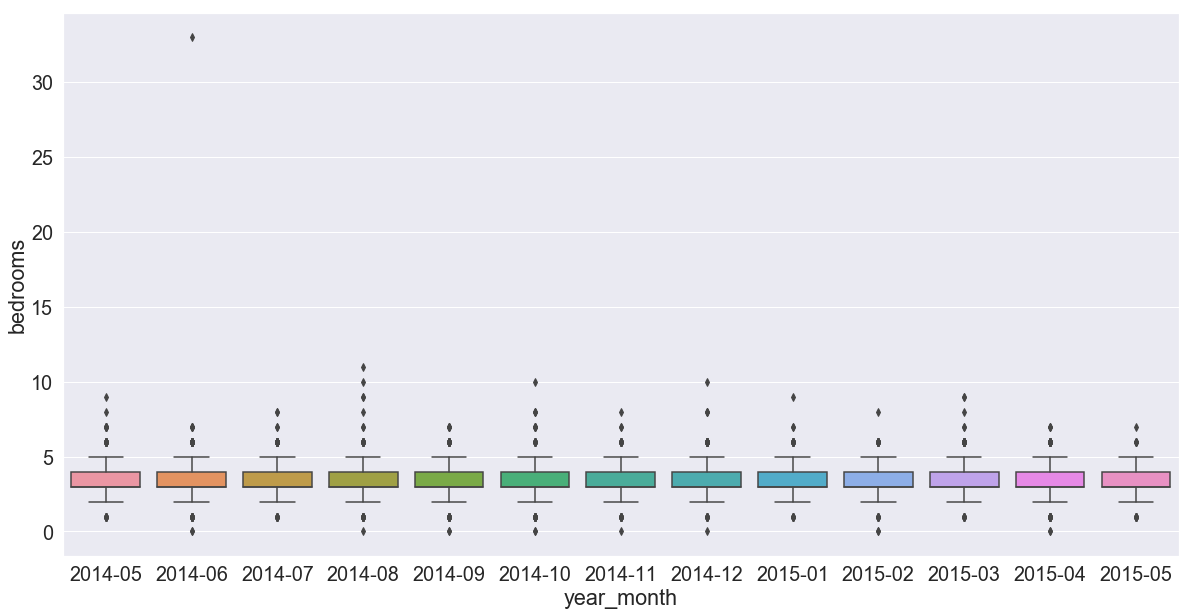

In [183]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='year_month', y="bedrooms", data=data, order=['2014-05', '2014-06', '2014-07', '2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05'])

### The price vs. square lot

In [184]:
data['price_per_lot'] = data['price'] / data['sqft_lot'] 

/Users/kuanyao.huang/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


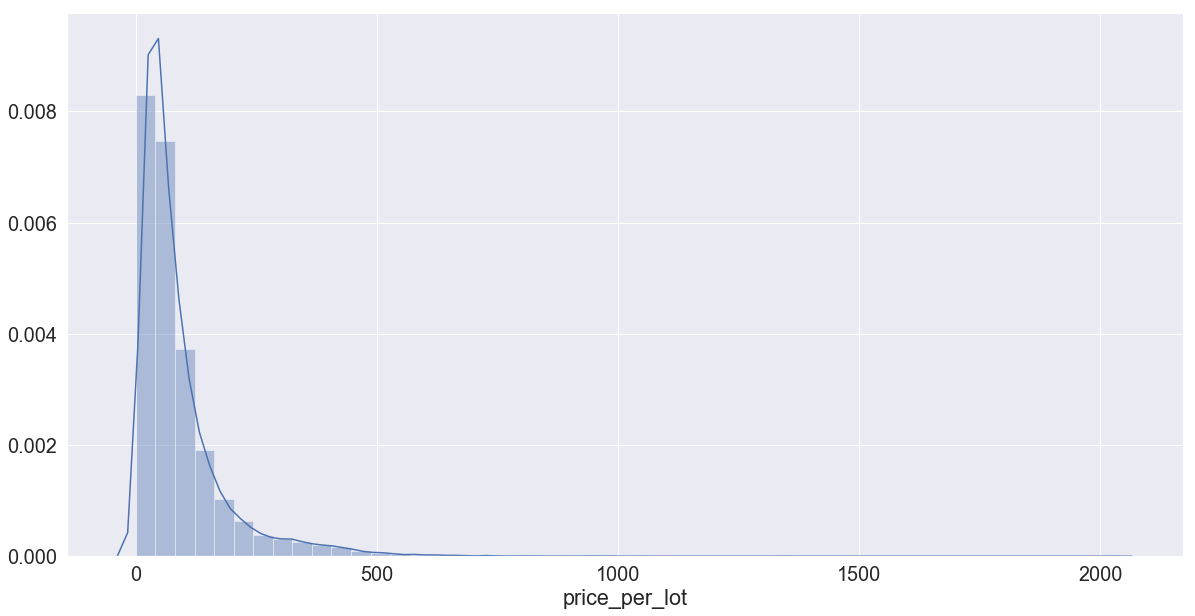

In [185]:
plt.figure(figsize=(20, 10))
#data.price.hist(bins=80)
sns.distplot(data['price_per_lot'])

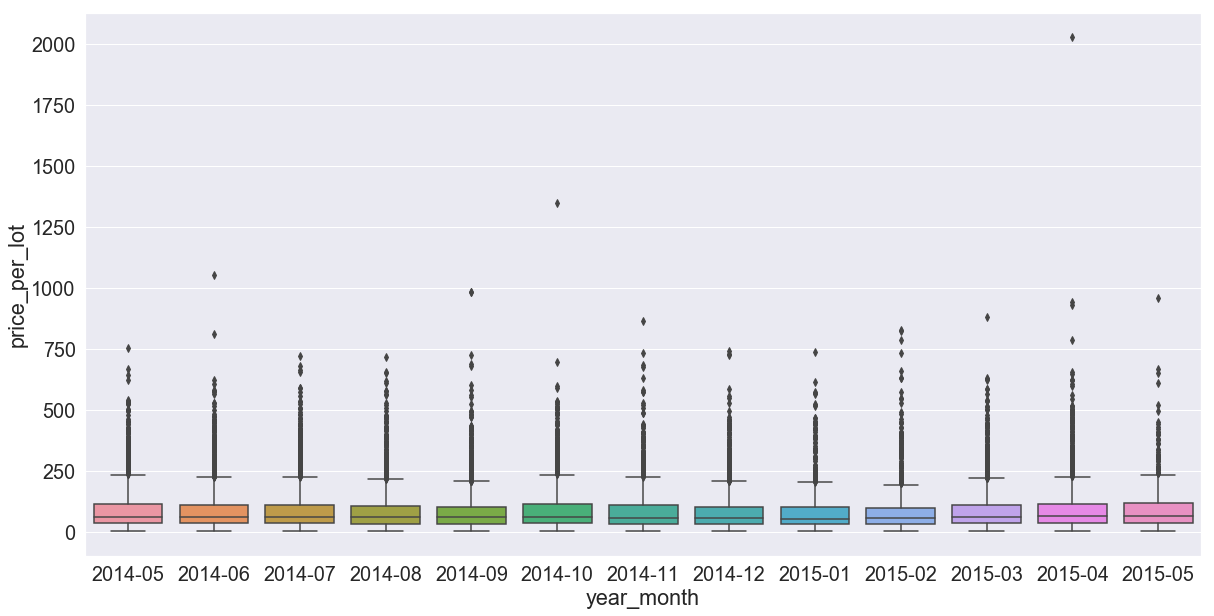

In [186]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='year_month', y="price_per_lot", data=data, order=['2014-05', '2014-06', '2014-07', '2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05'])

Although the deviation(outlier) of price is quite large for each month, it seemed that the price does not really change over time generally. 

## (2) What factor is mostly correlated to the house pricing ?

### correlation

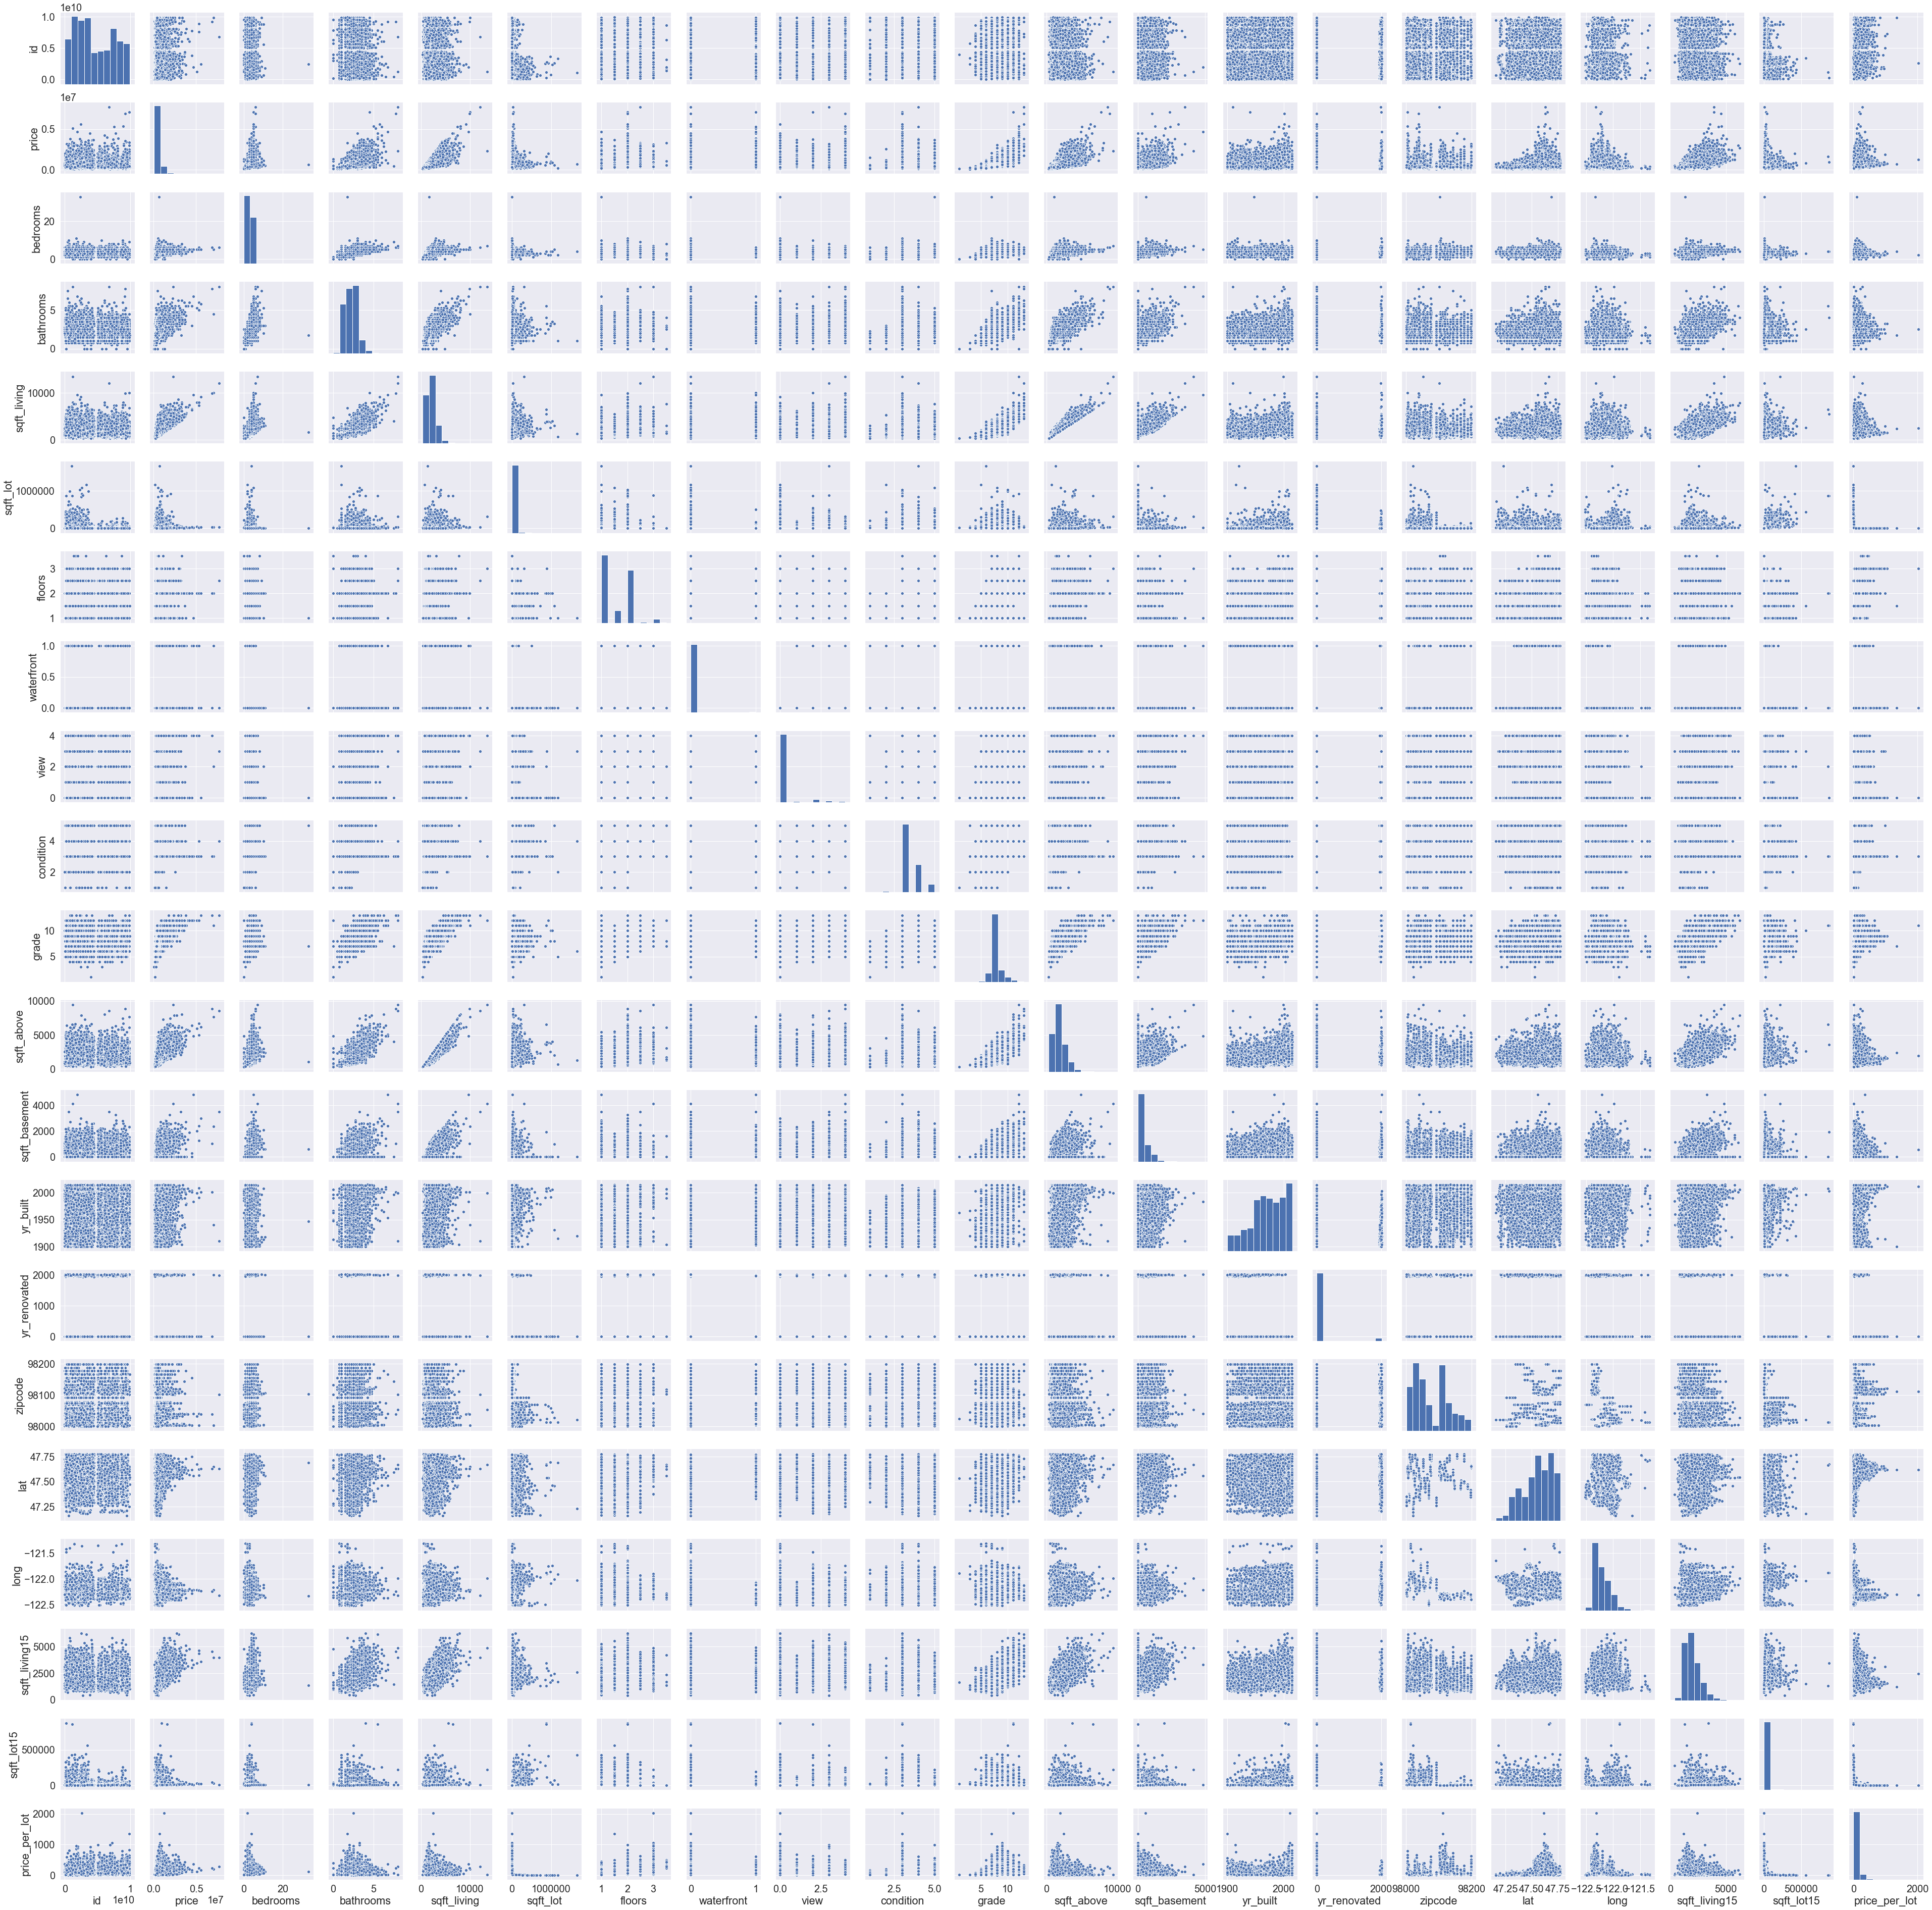

In [187]:
sns.pairplot(data)

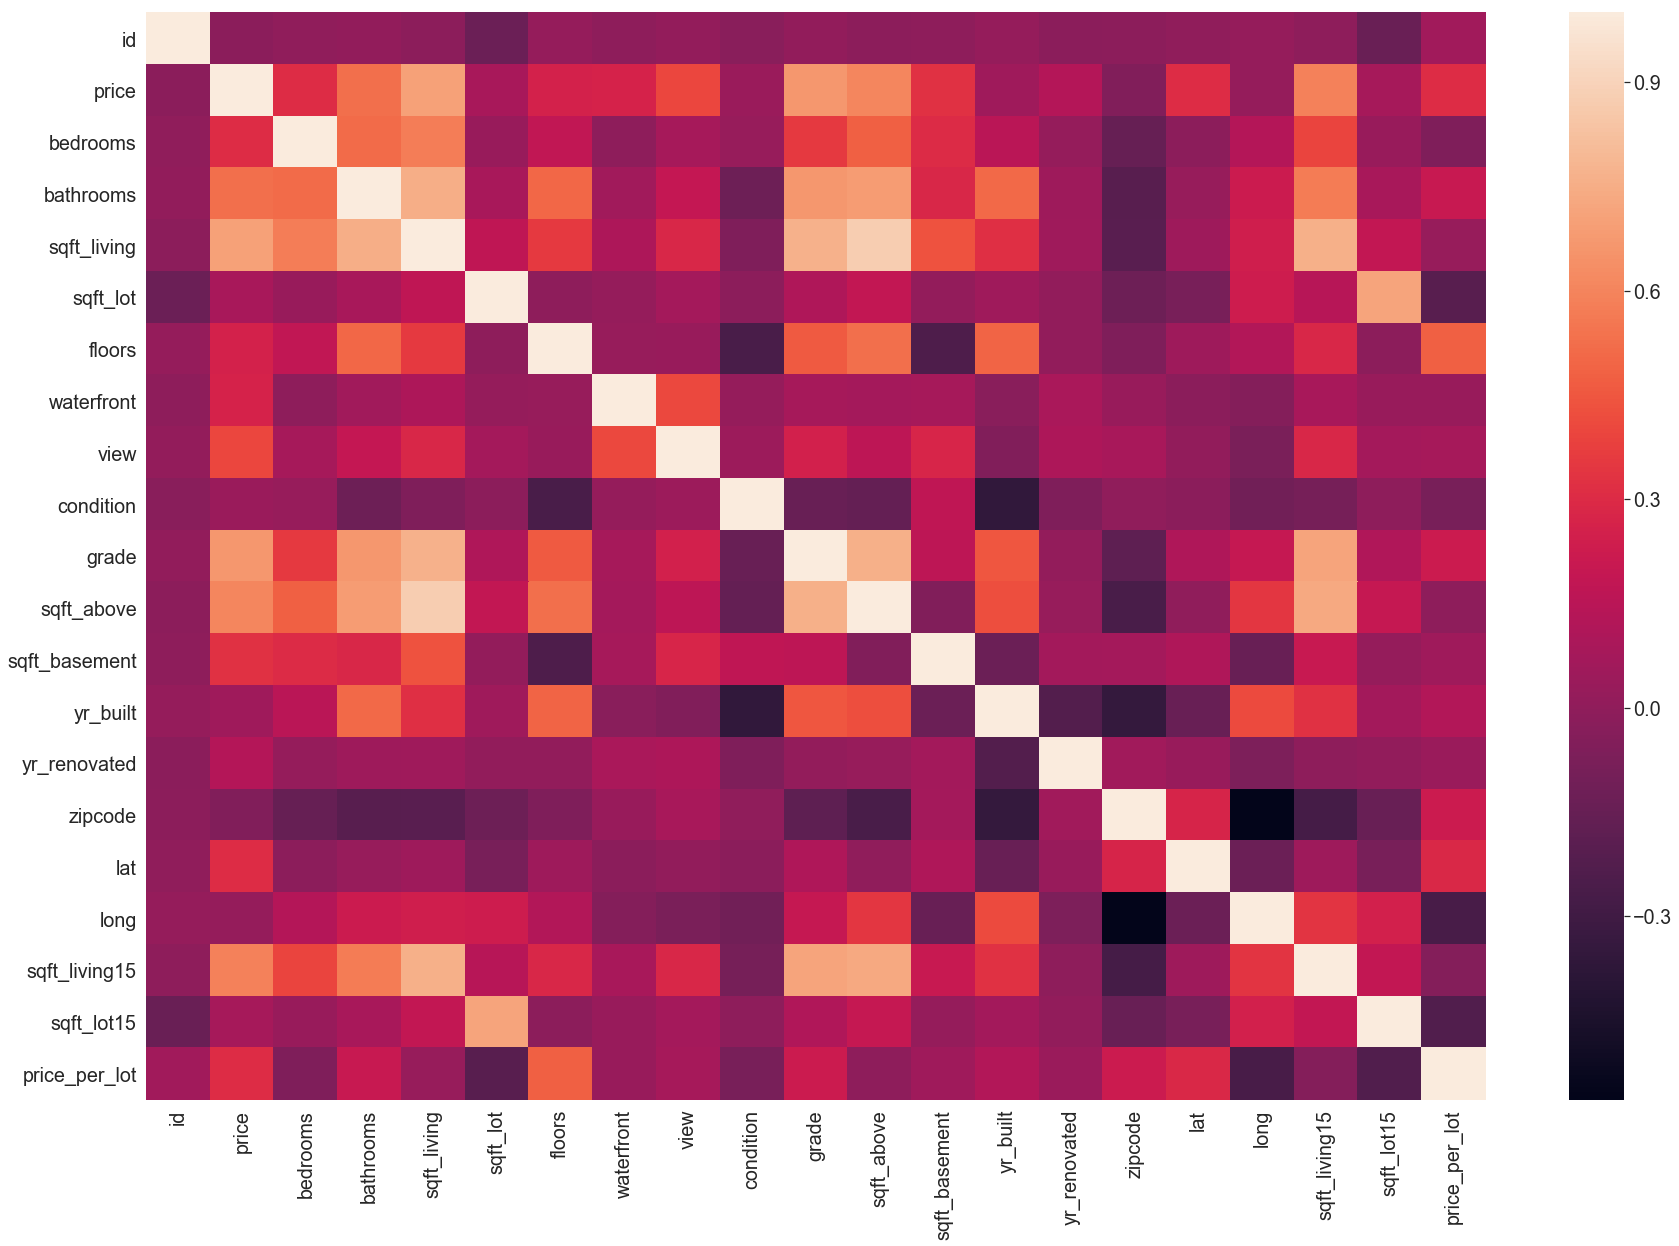

In [188]:
plt.figure(figsize=(30, 20))
corr = data.corr()
#sns.heatmap(corr, square=True, annot=True)
sns.set(font_scale=1.8)
sns.heatmap(corr)

In [189]:
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
price_per_lot    0.307849
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

To sum up, the first five factors that are stongly correlated with price are：

**sqft_living**： square footage of the home    
**grade**： overall grade given to the housing unit, based on King County grading system    
**sqft_above**： square footage of house apart from basement    
**sqft_living15**： Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area    
**bathrooms**： Number of bathrooms/House    

Surprisngly, square foot of a lot is not as important as square foot of a home, which means the price is more related to how big the house you bought but not how large the land you have! 
In order to have more robust result, I will use linear regression and decision tree to have more evidence of the main factors.

### Linear Regression

In [190]:
# transfer date field to other fields
data['year'] = data['date'].dt.strftime('%Y').astype(int)
data['month'] = data['date'].dt.strftime('%m').astype(int)

# Create X and y
y = data.price
X = data.drop(['price', 'year_month', 'id', 'date', 'price_per_lot'], axis=1)  # year_month, id, date, price_per_lot
model = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [191]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)  

0.7077910104990373

In [192]:
# Get the coefficients (refer to udacity partially)
coefs_df = pd.DataFrame()
coefs_df['factor'] = X_train.columns
coefs_df['coefs'] = model.coef_
coefs_df['abs_coefs'] = np.abs(model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

factor         coefs     abs_coefs
9      sqft_above  3.756783e+14  3.756783e+14
10  sqft_basement  3.756783e+14  3.756783e+14
2     sqft_living -3.756783e+14  3.756783e+14
14            lat  5.913295e+05  5.913295e+05
5      waterfront  5.649063e+05  5.649063e+05
15           long -2.150791e+05  2.150791e+05
8           grade  9.996144e+04  9.996144e+04
6            view  5.027788e+04  5.027788e+04
1       bathrooms  4.102540e+04  4.102540e+04
0        bedrooms -3.841878e+04  3.841878e+04
18           year  3.472269e+04  3.472269e+04
7       condition  2.731390e+04  2.731390e+04
11       yr_built -2.545444e+03  2.545444e+03
4          floors  2.083607e+03  2.083607e+03
19          month  5.521481e+02  5.521481e+02
13        zipcode -5.467421e+02  5.467421e+02
16  sqft_living15  2.582197e+01  2.582197e+01
12   yr_renovated  1.707581e+01  1.707581e+01
17     sqft_lot15 -3.398043e-01  3.398043e-01
3        sqft_lot  6.419554e-02  6.419554e-02

The main factor from linear regression are:    

**sqft_above**：　square footage of house apart from basement    
**sqft_basement**：　square footage of the basement    
**sqft_living**：square footage of the home    
**lat**：Latitude coordinate    
**waterfront**：House which has a view to a waterfront

### Random Forest

In [193]:
# Use the decision tree (random forest)
model_rf = RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(r2_score(y_test, y_pred_rf))

0.8764795970641595


In [194]:
coefs_rf = pd.DataFrame()
coefs_rf['factor'] = X_train.columns
coefs_rf['coefs'] = model_rf.feature_importances_
coefs_rf = coefs_df.sort_values('coefs', ascending=False)
coefs_rf

factor         coefs     abs_coefs
9      sqft_above  3.756783e+14  3.756783e+14
10  sqft_basement  3.756783e+14  3.756783e+14
14            lat  5.913295e+05  5.913295e+05
5      waterfront  5.649063e+05  5.649063e+05
8           grade  9.996144e+04  9.996144e+04
6            view  5.027788e+04  5.027788e+04
1       bathrooms  4.102540e+04  4.102540e+04
18           year  3.472269e+04  3.472269e+04
7       condition  2.731390e+04  2.731390e+04
4          floors  2.083607e+03  2.083607e+03
19          month  5.521481e+02  5.521481e+02
16  sqft_living15  2.582197e+01  2.582197e+01
12   yr_renovated  1.707581e+01  1.707581e+01
3        sqft_lot  6.419554e-02  6.419554e-02
17     sqft_lot15 -3.398043e-01  3.398043e-01
13        zipcode -5.467421e+02  5.467421e+02
11       yr_built -2.545444e+03  2.545444e+03
0        bedrooms -3.841878e+04  3.841878e+04
15           long -2.150791e+05  2.150791e+05
2     sqft_living -3.756783e+14  3.756783e+14

By using random forest, the R-squre increased to 87.6 %.    
The first five main factors are：    

**sqft_above**：　square footage of house apart from basement    
**sqft_basement**：　square footage of the basement    
**lat**： Latitude coordinate    
**waterfront**：House which has a view to a waterfront    
**grade**： overall grade given to the housing unit, based on King County grading system    


Based on the correlation and the modeling results,
the top three factors that affect price mostly are:

1. sqft_above： square footage of house apart from basement
2. sqft_basement：　square footage of the basement
3. lat：Latitude coordinate
4. waterfront：House which has a view to a waterfront
5. grade： overall grade given to the housing unit, based on King County grading system

## (3) Is it possible to tag a house as "cheap" or "expensive" ? 

Based on the random forest model above, the R-square was 87.6%.
Most data can be explained by the model.
As a result, I will use the model prediction to evaluate the real price.

In [195]:
data['rf_predict'] = model_rf.predict(X)
data['price_diff'] = data.rf_predict - data.price

In [197]:
# calculate standard deviation
data['price_diff_std'] = (data['price_diff'] - data['price_diff'].mean()) / data['price_diff'].std()

/Users/kuanyao.huang/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


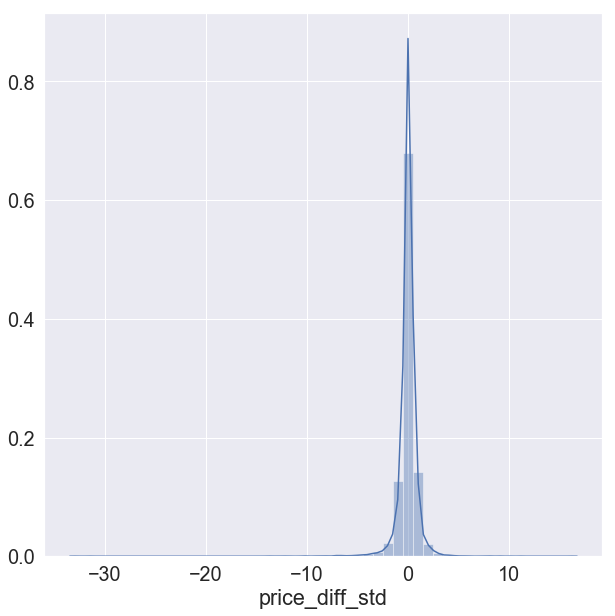

In [207]:
plt.figure(figsize=(10, 10))
sns.distplot(data['price_diff_std'])

In [199]:
def expensive_cheap(price_diff_std, deviation_num):
    if price_diff_std >= deviation_num:
        return 'cheap'
    elif price_diff_std <= -deviation_num:
        return 'expensive'
    else:
        return 'normal'

In [200]:
data['cheap_expensive'] = data['price_diff_std'].map(lambda x: expensive_cheap(x, 3))  # set 3 deviations (0.1%)

In [201]:
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view       ...         sqft_living15  \
0      5650     1.0           0     0       ...                  1340   
1      7242     2.0           0     0       ...                  1690   
2     10000     1.0           0     0       ...                  2720   
3      5000     1.0           0     0       ...                  1360   
4      8080     1.0           0     0       ...                  1800   

   sqft_lot15  year_month  price_per_lot  year  month     rf_predict  \
0        5650     2014-10      39.274336  2014     10  246736.700228   
1        7639     2014-12      74.288870  2014     12  501643.739985   
2        8062     2015-02      18.000000  2015      2  224358.671122   
3        5000     2014-12     120.800000  2014     12  555999.216345   
4        7503     2015-02      63.118812  2015      2  505772.751682   

     price_diff  price_diff_std  cheap_expensive  
0  24836.700228        0.297059           normal  
1 -36356.260015       -0.397290           normal  
2  44358.671122        0.518572           normal  
3 -48000.783655       -0.529419           normal  
4  -4227.248318       -0.032726           normal  

[5 rows x 29 columns]

In [208]:
np.sum(data['cheap_expensive'] != 'normal') / data.shape[0]

0.015592467496414195

In [209]:
# Expensive houses
data[data['cheap_expensive'] == 'expensive']['zipcode'].value_counts()

98004    22
98119    16
98040    16
98039    13
98112    13
98199    10
98033    10
98105     9
98006     9
98075     8
98115     7
98034     7
98109     7
98136     6
98122     6
98008     6
98027     5
98166     5
98144     5
98074     4
98103     4
98056     3
98177     3
98053     3
98107     2
98117     2
98102     2
98045     2
98146     2
98118     2
98125     2
98155     2
98178     2
98005     2
98010     2
98052     2
98042     1
98106     1
98019     1
98022     1
98024     1
98072     1
98065     1
98029     1
98038     1
Name: zipcode, dtype: int64

98004 (Bellevue,  King County, Washington, United States):  With metro

https://www.google.com/maps/place/%E3%82%A2%E3%83%A1%E3%83%AA%E3%82%AB%E5%90%88%E8%A1%86%E5%9B%BD+%E3%80%9298004+%E3%83%AF%E3%82%B7%E3%83%B3%E3%83%88%E3%83%B3%E5%B7%9E+%E3%83%99%E3%83%AB%E3%83%93%E3%83%A5%E3%83%BC/@47.5931424,-122.256935,12.22z/data=!4m5!3m4!1s0x54906c86648f1ab3:0x70905fed96b53f84!8m2!3d47.6264794!4d-122.2051488

In [210]:
# Cheap houses
data[data['cheap_expensive'] == 'cheap']['zipcode'].value_counts()

98040    15
98004    11
98112     9
98177     8
98006     7
98199     6
98034     5
98118     4
98116     3
98033     3
98155     3
98119     2
98005     2
98144     2
98074     2
98166     2
98053     2
98103     2
98092     1
98168     1
98072     1
98198     1
98102     1
98065     1
98045     1
98115     1
98125     1
98136     1
98011     1
98146     1
98023     1
98027     1
98028     1
98031     1
98008     1
98039     1
98003     1
Name: zipcode, dtype: int64

98040 (Mercer Island, King County, Washington, United States) :  No metro

https://www.google.com/maps/place/%E3%82%A2%E3%83%A1%E3%83%AA%E3%82%AB%E5%90%88%E8%A1%86%E5%9B%BD+%E3%80%9298040+%E3%83%AF%E3%82%B7%E3%83%B3%E3%83%88%E3%83%B3%E5%B7%9E+%E3%83%9E%E3%83%BC%E3%82%B5%E3%83%BC%E3%82%A2%E3%82%A4%E3%83%A9%E3%83%B3%E3%83%89/@47.5620701,-122.2798637,12.34z/data=!4m5!3m4!1s0x5490696298e6a771:0xeb4ecf2eb8a4edca!8m2!3d47.5824227!4d-122.2331227